#**CROP YIELD PREDICTION**

#Dataset 1

##Reading Dataset

In [1]:
import pandas as pd
df = pd.read_csv('c:/Users/HP LAPTOP/onedrive/desktop/smart-farming-ml-proj/app/Data/crop_production.csv', encoding='utf-8')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [2]:
df = df[df['State_Name']=='Andhra Pradesh']
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0
204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0
205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0
206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0
...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0


##Corelation Heatmap

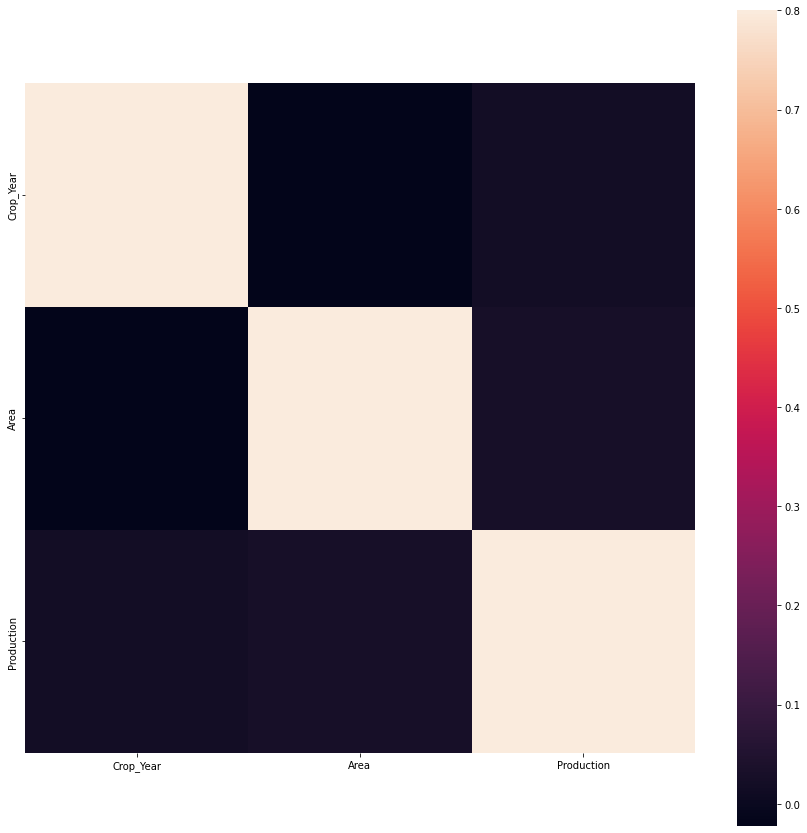

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [4]:
df = df[df['Crop_Year']>=2004]
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
493,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,32752.0,7893.0
494,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1021.0,403.0
495,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1578.0,923.0
496,Andhra Pradesh,ANANTAPUR,2004,Kharif,Cotton(lint),8933.0,7041.0
497,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3402.0,11288.0
...,...,...,...,...,...,...,...
9826,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tobacco,28046.0,89107.0
9827,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Tomato,224.0,3035.0
9828,Andhra Pradesh,WEST GODAVARI,2014,Rabi,Urad,5418.0,4833.0
9829,Andhra Pradesh,WEST GODAVARI,2014,Whole Year,Coconut,21729.0,718991000.0


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5957 entries, 493 to 9830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     5957 non-null   object 
 1   District_Name  5957 non-null   object 
 2   Crop_Year      5957 non-null   int64  
 3   Season         5957 non-null   object 
 4   Crop           5957 non-null   object 
 5   Area           5957 non-null   float64
 6   Production     5957 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 372.3+ KB


In [6]:
df.describe()

,Crop_Year,Area,Production
count,5957.000000,5957.000000,5.957000e+03
mean,2009.473728,13763.189021,2.118959e+06
std,3.288183,47751.747095,3.040240e+07
min,2004.000000,1.000000,1.000000e+00
25%,2006.000000,158.000000,2.540000e+02
50%,2010.000000,1039.000000,2.046000e+03
75%,2012.000000,6615.000000,1.591900e+04
max,2014.000000,877029.000000,7.801620e+08


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

State_Name = le.fit_transform(df.State_Name)
District_Name = le.fit_transform(df.District_Name)
Crop_Year = le.fit_transform(df.Crop_Year)
crop = le.fit_transform(df.Crop)
Season = le.fit_transform(df.Season)
Area = le.fit_transform(df.Season)
df['State_Name'] = State_Name
df['District_Name'] = District_Name
df['Crop_Year'] = Crop_Year
df['Crop'] = crop
df['Season']  = Season
df['Area']  = Area

C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_13524\3486301650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State_Name'] = State_Name
C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_13524\3486301650.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District_Name'] = District_Name
C:\Users\HP LAPTOP\AppData\Local\Temp\ipykernel_13524\3486301650.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [8]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
493,0,0,0,0,1,0,7893.0
494,0,0,0,0,2,0,403.0
495,0,0,0,0,7,0,923.0
496,0,0,0,0,10,0,7041.0
497,0,0,0,0,12,0,11288.0


In [9]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
9826,0,12,10,1,46,1,89107.0
9827,0,12,10,1,47,1,3035.0
9828,0,12,10,1,49,1,4833.0
9829,0,12,10,2,8,2,718991000.0
9830,0,12,10,2,36,2,1624324.0


In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [11]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [12]:
model=[]
r2_val=[]
mse_val=[]

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, Y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
a = r2_score(Y_test, y_test_pred)
r2_val.append(a)
b = mean_squared_error(Y_test, y_test_pred)
mse_val.append(b)
model.append('Random Forest Reg')
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))
print(forest.score(X_test,Y_test))

MSE train: 14390876051703.836, test: 9164570256273.434
R^2 train: 0.986, test: 0.984
0.9843862031879944


In [14]:
forest.predict(X_test)

array([30748.37 , 16264.082,   276.726, ...,  1073.919,  2731.397,
       13671.064])

In [15]:
forest.predict([[0,5,5,2,0,32752.0]])

array([10296.096])

In [16]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
493,0,0,0,0,1,0,7893.0
494,0,0,0,0,2,0,403.0
495,0,0,0,0,7,0,923.0
496,0,0,0,0,10,0,7041.0
497,0,0,0,0,12,0,11288.0


##Train and Test Split

In [17]:
import numpy as np  
state = input('enter state:')
district = input('enter district:')
year = input('enter year:')
season = input('enter season:')
crop = input('enter crop:')
area = input('enter area')

out_1 = forest.predict([[float(state),
       float(district),
       float(year),
       float(season),
       float(crop),
       float(area)]])

print('crop yield Production: ',out_1)

enter state: 0
enter district: 6
enter year: 0
enter season: 2
enter crop: 5
enter area 35741
crop yield Production:  [75.381]


In [18]:
import numpy as np  
from sklearn.linear_model import LinearRegression

###Linear Regression

In [19]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

linear_reg = LinearRegression().fit(X_train, Y_train)
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)
a = r2_score(Y_test, y_test_pred)
r2_val.append(a)
b = mean_squared_error(Y_test, y_test_pred)
mse_val.append(b)
model.append('Linear Regression')
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))

MSE train: 984232946665185.375, test: 581047147183667.375
R^2 train: 0.024, test: 0.010


###Support Vector Regressor

In [20]:
from sklearn.svm import SVR
svr=SVR(kernel='poly',epsilon=1.0)
svr.fit(X_train, Y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
a = r2_score(Y_test, y_test_pred)
r2_val.append(a)
b = mean_squared_error(Y_test, y_test_pred)
mse_val.append(b)
model.append('Support Vector Reg')
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))

MSE train: 1013557072540407.875, test: 589142605338281.000
R^2 train: -0.005, test: -0.004


###Lasso Regressor

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
a = r2_score(Y_test, y_test_pred)
r2_val.append(a)
b = mean_squared_error(Y_test, y_test_pred)
mse_val.append(b)
model.append('Lasso Regressor')

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_pred),
        mean_squared_error(Y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_pred),
        r2_score(Y_test, y_test_pred)))

MSE train: 984232946665185.375, test: 581047146710105.125
R^2 train: 0.024, test: 0.010


Accuracy Comparison

<AxesSubplot:title={'center':'R-Squared Value Comparison'}, xlabel='R-Squared Value', ylabel='Algorithm'>

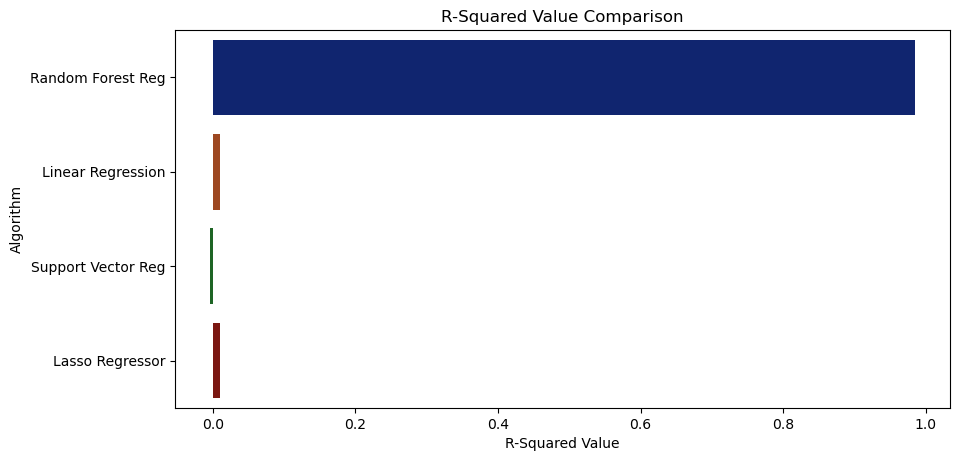

In [22]:
import seaborn as sns
plt.figure(figsize=[10,5],dpi = 100)
plt.title('R-Squared Value Comparison')
plt.xlabel('R-Squared Value')
plt.ylabel('Algorithm')
sns.barplot(x = r2_val,y = model,palette='dark')

<AxesSubplot:title={'center':'Error Comparison'}, xlabel='Mean Squared Error', ylabel='Algorithm'>

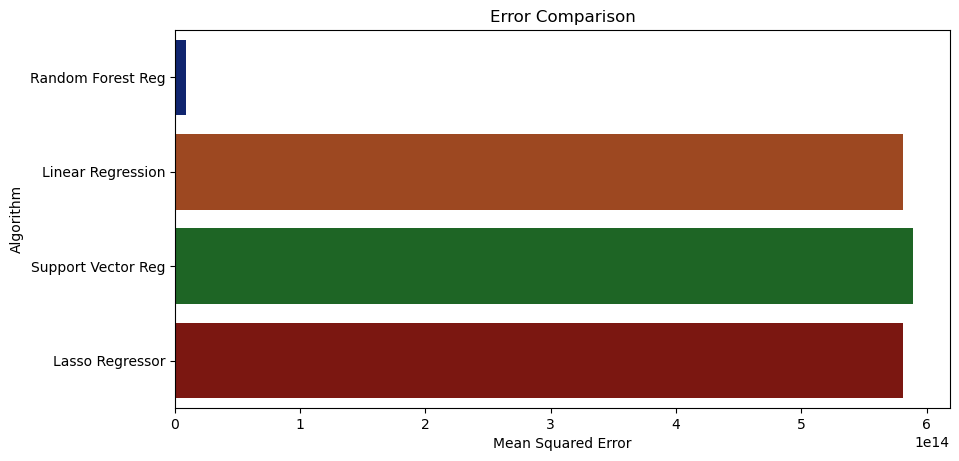

In [23]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Error Comparison')
plt.xlabel('Mean Squared Error')
plt.ylabel('Algorithm')
sns.barplot(x = mse_val,y = model,palette='dark')

Saving Best Trained Model 

In [24]:
import pickle
rf_pkl_fname = 'c:/Users/HP LAPTOP/onedrive/desktop/smart-farming-ml-proj/models/RfReg.pkl'
rf_Model_pkl = open(rf_pkl_fname, 'wb')
pickle.dump(forest, rf_Model_pkl)
rf_Model_pkl.close()